**Topic:  Classification**

**Settings**:  Where applicable, use test_size=.30, random_state=4444.  This will permit comparison of results across users.

**Data:**

Challenges 1-10:  congressional votes [Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

Challenge 11:     movie data

Challenge 12:     breast cancer surgery [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)


**Data – Congressional Votes**

Download the congressional votes data from here:[Congressional Voting Records Dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

These are votes of U.S. House of Representatives Congressmen on 16 key issues in 1984.

Read the description of the fields and download the data: house-votes-84.data

We will try to see if we can predict the house members' party based on their votes.

We will also use some of the general machine learning tools we learned (a bit more efficiently this time).


In [1]:
import pandas as pd
import numpy as np

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)



In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [3]:
df.iloc[:,1:] = df.iloc[:,1:].applymap(lambda x: 1 if x == 'y' else (0 if x == 'n' else '?') )

In [4]:
def get_mean_of_column(series):
    return pd.to_numeric(series, errors="coerce").mean()

for i in range(1,17):
    df[i] = df[i].map(lambda x: get_mean_of_column(df[i]) if x == '?' else x)

In [5]:
y = df[0]

In [6]:
X = df.drop(0, axis=1)


**Challenge 2**

Split the data into a test and training set. Use this function:

```
from sklearn.cross_validation import train_test_split
```



In [7]:
from sklearn.cross_validation import train_test_split


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)


**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
kn_scores = []
for n_score in range(1,21):
    nc = KNeighborsClassifier(n_neighbors=n_score)
    nc.fit(X_train, y_train)
    y_pred = nc.predict(X_test)
    kn_scores.append(accuracy_score(y_test, y_pred))

In [11]:
[print(i + 1, x) for i,x in enumerate(kn_scores)];

1 0.900763358779
2 0.893129770992
3 0.900763358779
4 0.900763358779
5 0.916030534351
6 0.931297709924
7 0.916030534351
8 0.923664122137
9 0.931297709924
10 0.931297709924
11 0.923664122137
12 0.923664122137
13 0.923664122137
14 0.923664122137
15 0.923664122137
16 0.923664122137
17 0.923664122137
18 0.916030534351
19 0.916030534351
20 0.916030534351


6, 9 and 10 give the same highest score of 0.93129



**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logm = LogisticRegression()

In [14]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_log_pred = logm.predict(X_test)
print(accuracy_score(y_test, y_log_pred))

0.93893129771



**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.




In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

Text(0,0.5,'Member Count')

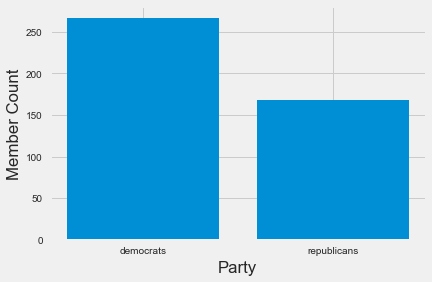

In [17]:
plt.bar(['democrats', 'republicans'], y.value_counts());
plt.xlabel('Party')
plt.ylabel('Member Count')

In [18]:
def dem_pred(list):
    return np.array(['democrat'] * len(list))


In [19]:
y_d_pred = dem_pred(X_test)

In [20]:
accuracy_score(y_test, y_d_pred)

0.58778625954198471

In [21]:
def rep_pred(list):
    return np.array(['republican'] * len(list))

In [22]:
y_r_pred = rep_pred(X_test)

In [23]:
accuracy_score(y_test, y_r_pred)

0.41221374045801529

**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.



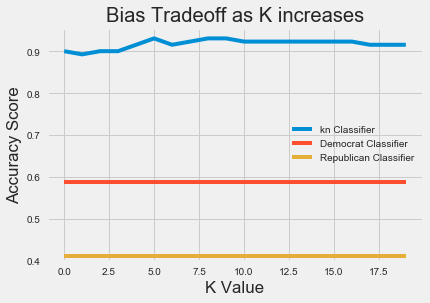

In [24]:
plt.plot(kn_scores, label="kn Classifier")
plt.plot(np.array([accuracy_score(y_test, y_d_pred)] * 20), label="Democrat Classifier")
plt.plot(np.array([accuracy_score(y_test, y_r_pred)] * 20), label="Republican Classifier")
plt.ylim(ymin=0.4)  # this line
plt.title('Bias Tradeoff as K increases')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.legend()


**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.



In [25]:
from sklearn.model_selection import learning_curve

In [26]:
lr_model = LogisticRegression()
m, train_score, ts_score = learning_curve(lr_model, X, y) 

In [27]:
m

array([ 29,  94, 159, 224, 290])

In [28]:
train_score

array([[ 1.        ,  0.96551724,  0.96551724],
       [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
       [ 0.98113208,  0.97484277,  0.97484277],
       [ 0.98214286,  0.97321429,  0.98214286],
       [ 0.96896552,  0.96551724,  0.97241379]])

In [29]:
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)

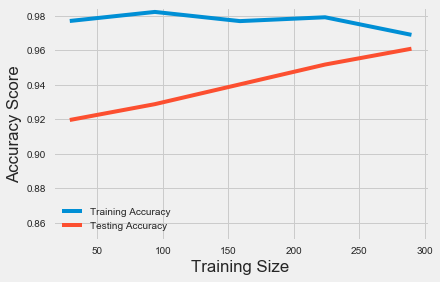

In [30]:
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.ylim(ymin=0.85)
plt.legend()


**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```


In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

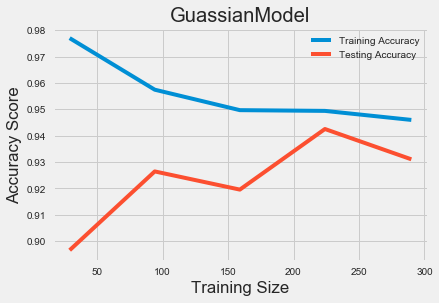

In [32]:
gauss_model = GaussianNB()
m, train_score, ts_score = learning_curve(gauss_model, X, y) 
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# plt.ylim(ymin=0.85)
plt.title('GuassianModel')
plt.legend()

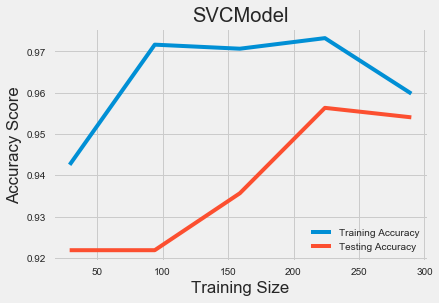

In [33]:
svc_model = SVC()
m, train_score, ts_score = learning_curve(svc_model, X, y) 
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# plt.ylim(ymin=0.85)
plt.title('SVCModel')
plt.legend()

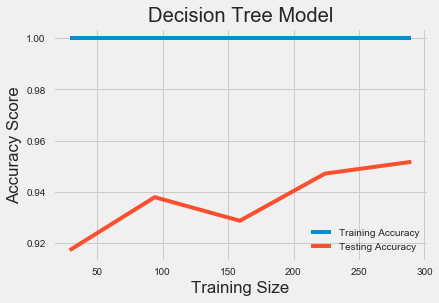

In [34]:
dtc_model = DecisionTreeClassifier()
m, train_score, ts_score = learning_curve(dtc_model, X, y) 
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# plt.ylim(ymin=0.85)
plt.title('Decision Tree Model')
plt.legend()

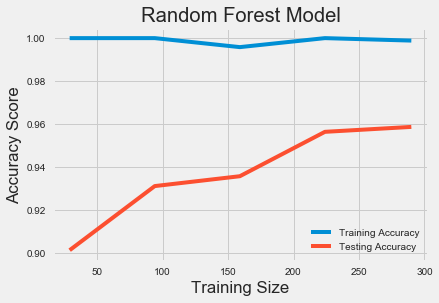

In [35]:
rf_model = RandomForestClassifier()
m, train_score, ts_score = learning_curve(rf_model, X, y) 
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# plt.ylim(ymin=0.85)
plt.title('Random Forest Model')
plt.legend()



**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.


In [36]:
from sklearn.cross_validation import cross_val_score

In [37]:
print("N Neighbors:", np.mean(cross_val_score(nc, X, y)))
print("Logistic Regression:", np.mean(cross_val_score(lr_model, X, y)))
print("Gaussian:", np.mean(cross_val_score(gauss_model, X, y)))
print("Svc Model:", np.mean(cross_val_score(svc_model, X, y)))
print("Decision Tree model:", np.mean(cross_val_score(dtc_model, X, y)))
print("Random Forest model:", np.mean(cross_val_score(rf_model, X, y)))

N Neighbors: 0.91724137931
Logistic Regression: 0.96091954023
Gaussian: 0.931034482759
Svc Model: 0.954022988506
Decision Tree model: 0.951724137931
Random Forest model: 0.958620689655




**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.


In [38]:
df_2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
#Drop Party Column
df_2 = df_2.drop(0, axis=1)
# Convert y-->1, n-->0.
df_2 = df_2.applymap(lambda x: 1 if x == 'y' else (0 if x == 'n' else '?') )


In [39]:
def get_mode_of_column(series):
    return pd.to_numeric(series, errors="coerce").mode()

for i in range(1,17):
    df_2[i] = df_2[i].map(lambda x: int(get_mode_of_column(df_2[i])[0]) if x == '?' else x)

# Set 11 as the target
y_2 = df_2[10]
X_2 = df_2.drop(10, axis=1)

In [40]:
np.mean(cross_val_score(lr_model, X_2, y_2))

0.5239002169387148



**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?


In [41]:
df_3 = pd.read_csv('./amazon_data/2013_movies.csv')

In [42]:
df_3 = df_3.dropna()

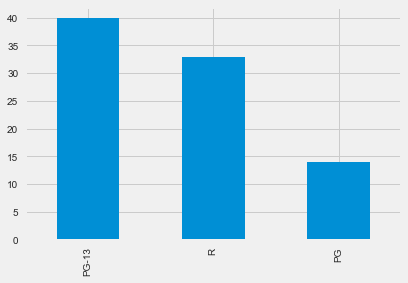

In [43]:
df_3['Rating'].value_counts().plot.bar()

In [44]:
y_3 = df_3['Rating'].copy()

In [45]:
df_3['MonthRelease'] = df_3['ReleaseDate'].map(lambda x: pd.to_datetime(x).month)
# df_3['YearRelease'] = df_3['ReleaseDate'].map(lambda x: pd.to_datetime(x).year)

In [46]:
X_3 = df_3.drop(['Rating', 'Title', 'Director', 'ReleaseDate'], axis=1)

In [47]:
lr_model_1 = LogisticRegression()
lr_model_2 = KNeighborsClassifier()

In [48]:
X_3.head()

,Budget,DomesticTotalGross,Runtime,MonthRelease
0,130000000.0,424668047,146,11
1,200000000.0,409013994,129,5
2,150000000.0,400738009,108,11
3,76000000.0,368061265,98,7
4,225000000.0,291045518,143,6


In [49]:
#Logistic Regression
np.mean(cross_val_score(lr_model_1, X_3, y_3))

0.55060207991242471

In [50]:
# KNeighbors
np.mean(cross_val_score(lr_model_2, X_3, y_3))

0.36814449917898195

In [51]:
stupid_pred = np.array([df_3['Rating'].mode()[0]] * len(y_3))

In [52]:
# Stupid Predictor
accuracy_score(y_3, stupid_pred)

0.45977011494252873

KNN does worse, but Logistic Regression does slightly better. None of them are accurate.

In [53]:
lr_model_1.fit(X_3, y_3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lr_model_1.coef_

array([[ -6.98558916e-09,  -5.01821745e-09,  -1.61743123e-13,
         -8.91795792e-15],
       [  8.69092546e-09,  -4.44510939e-09,  -4.67765454e-14,
         -3.66380400e-15],
       [ -1.78037425e-08,   3.48107421e-09,   9.80588275e-14,
          4.75100617e-15]])

In [55]:
lr_model_1.classes_

array(['PG', 'PG-13', 'R'], dtype=object)

What are the coefficients of logistic regression? Which features affect the outcome how? 

Each set of coefficients is the probably of each categorical possibility being true. In this case, the ratings are R, PG-13, and PG, and so we have 3 sets of coefficients.

Each individual coefficient corresponds to the increase (or decrease) in the log of the odds, per unit increment of the feature.

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

In [56]:
df_hab = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=['age', 'operation_year', 'nodes', 'survival'])

In [57]:
df_hab['survival'] = df_hab['survival'].map( lambda x: 0 if x == 2 else x)

* What is the average and standard deviation of the age of all of the patients?

In [58]:
print('Average Age:', df_hab['age'].mean())
print('Standard Deviation of Age', df_hab['age'].std())

Average Age: 52.45751633986928
Standard Deviation of Age 10.80345234930328


* What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [59]:
print('Average Age of Survivors:', df_hab[df_hab['survival'] == 1]['age'].mean())
print('Standard Deviation of Age of Survivors', df_hab[df_hab['survival'] == 1]['age'].std())

Average Age of Survivors: 52.01777777777778
Standard Deviation of Age of Survivors 11.012154179929546


 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 

In [60]:
print('Average Age of Non Survivors:', df_hab[df_hab['survival'] == 2]['age'].mean())
print('Standard Deviation of Age of Non Survivors', df_hab[df_hab['survival'] == 2]['age'].std())

Average Age of Non Survivors: nan
Standard Deviation of Age of Non Survivors nan


* Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 

Text(0.5,1,'Node Count Distributes')

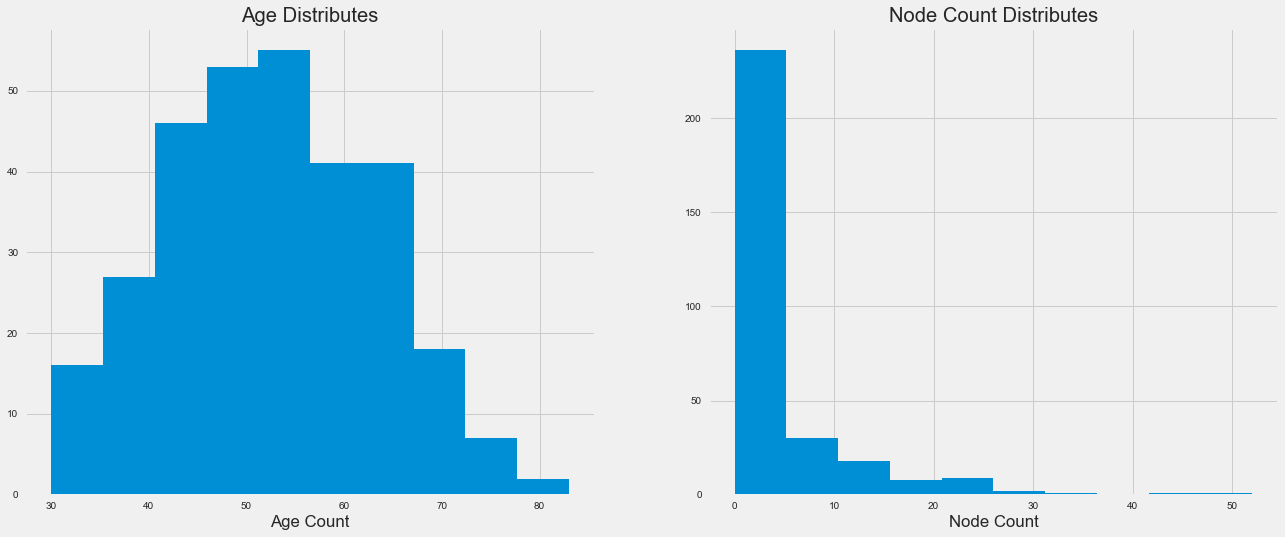

In [61]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df_hab['age'])
plt.title('Age Distributes')
plt.xlabel('Age Count')
plt.subplot(1,2,2)
plt.hist(df_hab['nodes']);
plt.xlabel('Node Count')
plt.title('Node Count Distributes')
# df_hab['nodes'].hist()
# plt.legend()

* What is the earliest year of surgery in this dataset?
 

In [62]:
sorted(df_hab['operation_year'])[0]

58

* What is the most recent year of surgery?


In [63]:
sorted(df_hab['operation_year'])[-1]

69

 * Use logistic regression to predict survival after 5 years. How well does your model do?
 

In [64]:
X = df_hab.drop(['survival'], axis=1).copy()

In [65]:
y = df_hab['survival']

In [66]:
lr_model = LogisticRegression()

In [67]:
X_train, X_te, y_train, y_te = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
y_pred = lr_model.predict(X_te)

In [70]:
accuracy_score(y_pred, y_te)

0.75247524752475248

In [71]:
print("Logistic Regression:", np.mean(cross_val_score(lr_model, X, y)))

Logistic Regression: 0.751633986928


* What are the coefficients of logistic regression? Which features affect the outcome how?


In [72]:
list(zip(X.columns, lr_model.coef_[0]))

[('age', -0.028491056455494563),
 ('operation_year', 0.04690971836188311),
 ('nodes', -0.090463608939842857)]

That means for every unit increase in `age` there is a e^b increase in the odds of the person surviving.

 * Draw the learning curve for logistic regression in this case.

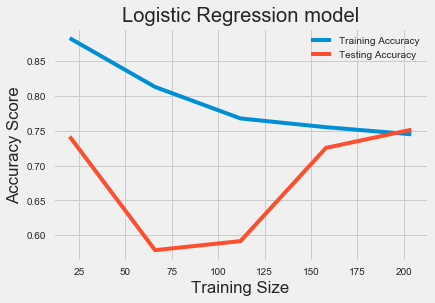

In [73]:
m, train_score, ts_score = learning_curve(lr_model, X, y) 
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(ts_score, axis=1)
plt.plot(m, train_cv_score, label="Training Accuracy")
plt.plot(m, test_cv_score, label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
# plt.ylim(ymin=0.85)
plt.title('Logistic Regression model')
plt.legend()